In [1]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import DataLoader

from src.models.con_vqvae import InfoNCE_VQVAE
from src.models.con_vqvae import BarlowTwinsVQVAE

from src.preprocessing.augmentations import Augmentations
from src.preprocessing.preprocess_ucr import AugUCRDataset, UCRDataset, UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.utils import save_model

import numpy as np
import matplotlib.pyplot as plt


In [2]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader_non_aug, test_data_loader= [build_data_pipeline(batch_size, dataset_importer, config, kind) for kind in ['train', 'test']]

augmentations = ['AmpR', 'jitter', 'warp']
train_data_loader_aug = build_data_pipeline(batch_size, dataset_importer, config, "train", augmentations)

self.X_train.shape: (7200, 46)
self.X_test.shape: (16800, 46)
# unique labels (train): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
# unique labels (test): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [3]:
for batch in train_data_loader_aug:
    subxs, y = batch
    break

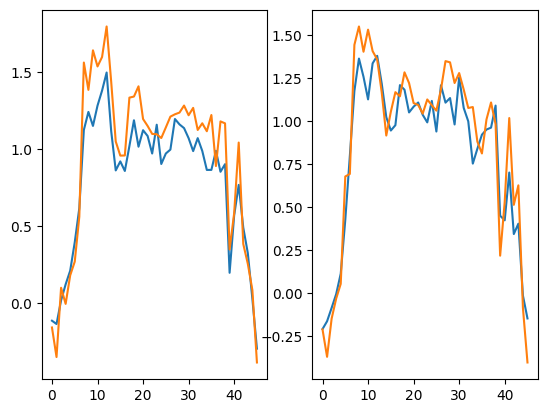

In [4]:
x11, x21 = subxs[0]
x12, x22 = subxs[1]

x11 = x11.squeeze(1)
x21 = x21.squeeze(1)
x12 = x12.squeeze(1)
x22 = x22.squeeze(1)

f, a = plt.subplots(1, 2)
i = 11
a[0].plot(x11[i])
a[0].plot(x21[i])
a[1].plot(x12[i])
a[1].plot(x22[i])